<a href="https://colab.research.google.com/github/adithyanum/fake_news_detector/blob/main/fake_news_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📰 Fake News Detection using NLP and Logistic Regression

This project uses **Natural Language Processing (NLP)** and a **Logistic Regression** model to detect whether a news article is **FAKE** or **REAL**.

We use text preprocessing, feature extraction with **TF-IDF**, and a simple but effective classifier to achieve high accuracy.




## 📁 Dataset Overview

We are using the dataset from Kaggle: [Fake and Real News Dataset](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset)

It contains two files:
- `Fake.csv`: News articles labeled as FAKE
- `True.csv`: News articles labeled as REAL

We combine them into a single DataFrame for processing.



In [52]:
import pandas as pd

In [53]:
df_fake = pd.read_csv("/content/drive/MyDrive/fake_or_real_dataset/Fake.csv")
df_real = pd.read_csv("/content/drive/MyDrive/fake_or_real_dataset/True.csv")

In [54]:
df_fake.head(15)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [55]:
df_real.head(15)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [56]:
df_fake['label'] = 'FAKE'

In [57]:
df_real['label'] = 'REAL'

In [58]:
df = pd.concat([df_fake, df_real], ignore_index = True)

In [59]:
df.head(15)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",FAKE
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",FAKE
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",FAKE
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",FAKE
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",FAKE
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",FAKE
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",FAKE


In [60]:
df.tail(15)

,title,text,subject,date,label
44883,Exclusive: Trump's Afghan decision may increas...,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,worldnews,"August 22, 2017",REAL
44884,U.S. puts more pressure on Pakistan to help wi...,WASHINGTON (Reuters) - The United States sugge...,worldnews,"August 21, 2017",REAL
44885,Exclusive: U.S. to withhold up to $290 million...,WASHINGTON (Reuters) - The United States has d...,worldnews,"August 22, 2017",REAL
44886,Trump talks tough on Pakistan's 'terrorist' ha...,ISLAMABAD (Reuters) - Outlining a new strategy...,worldnews,"August 22, 2017",REAL
44887,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",REAL
44888,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",REAL
44889,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",REAL
44890,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",REAL
44891,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",REAL
44892,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",REAL


In [61]:
df = df.sample(frac =1, random_state = 42).reset_index(drop =True)

In [62]:
df.head(20)

,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",FAKE
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",REAL
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",REAL
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",FAKE
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",REAL
5,Paul Ryan Responds To Dem’s Sit-In On Gun Con...,"On Wednesday, Democrats took a powerful stance...",News,"June 22, 2016",FAKE
6,AWESOME! DIAMOND AND SILK Rip Into The Press: ...,President Trump s rally in FL on Saturday was ...,Government News,"Feb 19, 2017",FAKE
7,STAND UP AND CHEER! UKIP Party Leader SLAMS Ge...,He s been Europe s version of the outspoken Te...,left-news,"Mar 8, 2016",FAKE
8,North Korea shows no sign it is serious about ...,WASHINGTON (Reuters) - The State Department sa...,worldnews,"December 13, 2017",REAL
9,Trump signals willingness to raise U.S. minimu...,(This version of the story corrects the figur...,politicsNews,"May 4, 2016",REAL


In [63]:
print("Total article : ", df.shape)

Total article :  (44898, 5)


In [64]:
print(df['label'].value_counts())

label
FAKE    23481
REAL    21417
Name: count, dtype: int64


In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

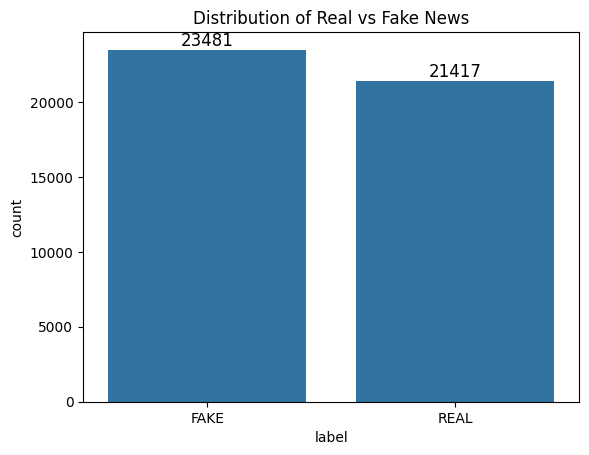

In [84]:
ax = sns.countplot(data = df, x = 'label')

plt.title("Distribution of Real vs Fake News")

for p in ax.patches :
    count = int(p.get_height())
    ax.annotate(str(count),
                (p.get_x() + p.get_width() / 2., count),
                ha = 'center', va = 'bottom',
                fontsize = 12, color = 'black')
plt.show()

## ✂️ Text Cleaning and Preprocessing

To prepare the news articles for machine learning, we:
- Convert all text to lowercase
- Remove punctuation, numbers, and extra whitespace
- Remove stopwords (like "the", "and", "is")
- Use **lemmatization** to reduce words to their root form (e.g., "running" → "run") using part-of-speech tagging


In [65]:
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

In [66]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [67]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text) :
    text = text.lower()
    text = re.sub(r"http\S+|www.\S+|<.*?>", " ", text)  # remove URLs/HTML
    text = re.sub(r"\d+", " ", text)

    words = word_tokenize(text)
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if word not in stop_words]

    tagged = pos_tag(words)
    lemmatized = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in tagged]

    return " ".join(lemmatized)

df['cleaned_text'] = df['text'].apply(clean_text)

df[['text', 'cleaned_text']].head()

,text,cleaned_text
0,"21st Century Wire says Ben Stein, reputable pr...",st century wire say ben stein reputable profes...
1,WASHINGTON (Reuters) - U.S. President Donald T...,washington reuters president donald trump remo...
2,(Reuters) - Puerto Rico Governor Ricardo Rosse...,reuters puerto rico governor ricardo rossello ...
3,"On Monday, Donald Trump once again embarrassed...",monday donald trump embarrass country accident...
4,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",glasgow scotland reuters presidential candidat...


## 🔢 TF-IDF Vectorization

We use `TfidfVectorizer` to convert text into numerical features.

- `max_features = 5000`: We keep the top 5000 most frequent and informative words.
- TF-IDF scores help identify important words by penalizing common ones.


In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [72]:
vectorizer = TfidfVectorizer(max_features = 5000)

In [73]:
X = vectorizer.fit_transform(df['cleaned_text'])

y = df['label']

In [74]:
print("TF-IDF Matrix Shape:", X.shape)
print("Sample Features:", vectorizer.get_feature_names_out()[:20])


TF-IDF Matrix Shape: (44898, 5000)
Sample Features: ['aaron' 'abadi' 'abandon' 'abbas' 'abbott' 'abc' 'abdullah' 'abe'
 'abedin' 'abide' 'ability' 'able' 'aboard' 'abolish' 'abortion' 'abroad'
 'absence' 'absolute' 'absolutely' 'absurd']


## 📚 Train-Test Split

We split the dataset into:
- 80% training data
- 20% testing data

We use `stratify=y` to maintain the original FAKE/REAL ratio in both sets.


In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, stratify=y, random_state=42)

print("Training Samples : ", X_train.shape[0])
print("Testing Samples : ", X_test.shape[0])

Training Samples :  35918
Testing Samples :  8980


## 🤖 Training the Logistic Regression Model

We train a simple **Logistic Regression** model, which is efficient and interpretable for binary classification tasks like ours.


In [77]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## 📊 Model Evaluation

We evaluate the model using:
- **Accuracy**
- **Confusion Matrix** (visualized)
- **Classification Report** with precision, recall, and F1-score

This helps us understand how well the model detects FAKE vs REAL articles.


In [79]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [81]:
y_pred = model.predict(X_test)

print("Accuracy : ", format(accuracy_score(y_test, y_pred), ".4f"))

print("\nConfusion Matrix :\n", confusion_matrix(y_test, y_pred))

print("\nClassification Report :\n", classification_report(y_test, y_pred))

Accuracy :  0.9863

Confusion Matrix :
 [[4618   78]
 [  45 4239]]

Classification Report :
               precision    recall  f1-score   support

        FAKE       0.99      0.98      0.99      4696
        REAL       0.98      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



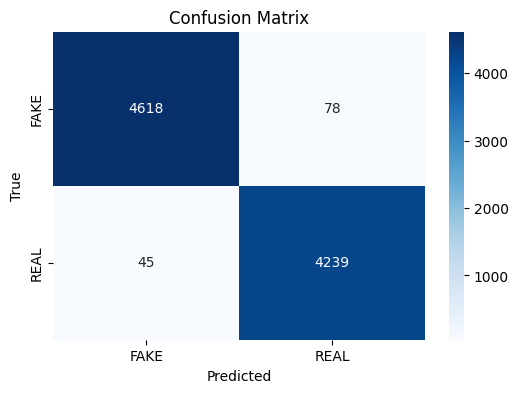

In [85]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## ✅ Final Results

Our Logistic Regression model performed exceptionally well on the fake news dataset with **nearly 99% accuracy**.

### 🔍 Performance Metrics:
- **Accuracy**: 98.63%
- **TF-IDF Features Used**: Top 5,000 informative words
- **Test Samples Evaluated**: 8,980 articles
- **Model**: Logistic Regression (simple, fast, interpretable)

The model demonstrates strong generalization, with a well-balanced performance across both classes.

### 📊 Confusion Matrix Summary

|               | Predicted FAKE | Predicted REAL |
|---------------|----------------|----------------|
| **Actual FAKE** |     4618       |       78        |
| **Actual REAL** |      45        |      4239       |

- **Precision (FAKE)**: 0.99
- **Recall (REAL)**: 0.99
- **Weighted F1-Score**: 0.99


## 💾 Saving the Model and Vectorizer

We save the trained TF-IDF vectorizer and the logistic regression model using `joblib`.

These saved files can later be reused for:
- Testing new real-world articles
- Deploying with a Streamlit app


In [87]:
from joblib import dump

In [88]:
dump(vectorizer, 'tfidf_vectorizer.joblib')
dump(model, 'fake_news_detection_model.joblib')

['fake_news_detection_model.joblib']

In [89]:
dump(vectorizer, '/content/drive/MyDrive/fake_news_detector/tfidf_vectorizer.joblib')
dump(model, '/content/drive/MyDrive/fake_news_detector/fake_news_detection_model.joblib')


['/content/drive/MyDrive/fake_news_detector/fake_news_detection_model.joblib']

## 🙏 Acknowledgment

- **Dataset Source**: [Fake and Real News Dataset on Kaggle](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset)
- Thanks to the open-source Python community for tools like:
  - **Pandas**, **Scikit-learn**, **NLTK**, **Matplotlib**, and **Seaborn**

This project was created as part of a learning journey into **applied NLP and machine learning**.
